In [1]:
# At first, we need to import necessary packages
# Data will be scraped from CBAR website
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [2]:
# Defining a date table for adding to original table
def date_table():
    date_table = pd.date_range(start="1/31/2013", end = datetime.date(year=2020, month=6, day=28), freq="M")
    return date_table

In [3]:
# Defining a function to get and clean the data format. Data will cover monthly from 2013 to today
def LoanTable():
    dates = date_table()
    url = "https://uploads.cbar.az/assets/27c65c284d3ccd3ee7dad1ace.xlsx"
    data = pd.read_excel(url)
    data2 = data.loc[:, :"Unnamed: 34"]
    loan_table = data2[121:]
    columns = ['da', 'total loans to sector', 'total amount of overdue loans',
               'total % of overdue loans', 'total amount of trade loans',
               'total % of trade loans', 'total amount of power loans',
                'total % of power loans', 'total amount of agri loans',
                'total % of agri loans', 'total amount of construction loans',
                'total % of construction loans', 'total amount of industry loans', 
                'total % of industry loans', 'total amount of transport loans',
                'total % of transport loans', 'total amount of retail loans',
                'total % of retail loans', 'total amount of mortgage loans',
                'total % of mortgage loans', 'total amount of PO loans',
                'total % of PO loans', 'total amount of government loans',
                'total % of government loans', 'total amount of loans to other sector',
                'total % of loans to other sector', 'total amount of LoC loans',
                'total % of LoC loans', 'total amount of guarantees', 'total % of guarantees',
                'total amount of factoring loans', 'total % of factoring loans',
                'total amount of overdraft loans', 'total % of overdraft loans', 
                'total amount of financial sector loans']    
    loan_table.columns=columns    
    loan_table.reset_index(inplace=True)
    pd.set_option('display.max_rows', loan_table.shape[0]+1)
    loan_table['length'] = loan_table.da.str.len()
    year_cols = loan_table[loan_table['length'] != 2 ].index
    loan_table.drop(year_cols, inplace=True)
    loan_table.fillna(0)
    loan_table["Date"] = dates
    return loan_table

In [4]:
# Assigning our table to a variable called loans
loans = LoanTable()
loans.head()

/Users/faridjafarov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/faridjafarov/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/faridjafarov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,index,da,total loans to sector,total amount of overdue loans,total % of overdue loans,total amount of trade loans,total % of trade loans,total amount of power loans,total % of power loans,total amount of agri loans,...,total % of LoC loans,total amount of guarantees,total % of guarantees,total amount of factoring loans,total % of factoring loans,total amount of overdraft loans,total % of overdraft loans,total amount of financial sector loans,length,Date
1,122,01,12479.3,763.837,6.12085,2546.45,20.4054,376.975,3.02081,549.443,...,3.83172,44.1797,0.354025,0.08388,0.000672155,8.22174,0.0658831,148.526,2.0,2013-01-31
2,123,02,12207.9,760.959,6.23333,2062.92,16.8982,294.926,2.41586,592.847,...,3.73504,44.2512,0.36248,0.08388,0.000687095,7.20237,0.0589975,169.213,2.0,2013-02-28
3,124,03,12451.1,760.753,6.10992,2092.46,16.8054,295.193,2.37082,606.097,...,3.63313,44.2796,0.355628,2.40186,0.0192903,6.25279,0.0502187,153.278,2.0,2013-03-31
4,125,04,13019.5,754.732,5.79694,2110.1,16.2072,301.153,2.31309,602.107,...,3.28995,46.0815,0.353943,2.81529,0.0216236,14.2146,0.10918,168.046,2.0,2013-04-30
5,126,05,13406.3,768.697,5.73384,2132.51,15.9067,290.143,2.16422,609.851,...,3.28674,45.9136,0.342478,2.98482,0.0222643,10.6642,0.0795462,164.485,2.0,2013-05-31


In [5]:
# Getting the shape of the data
loans.shape

(89, 38)

In [6]:
# General description of the dataset
loans.describe()

,index,length
count,89.000000,89.0
mean,169.224719,2.0
std,27.980412,0.0
min,122.000000,2.0
25%,145.000000,2.0
50%,169.000000,2.0
75%,193.000000,2.0
max,217.000000,2.0


In [7]:
# Adding Year and Month Columns
loans['Year'] = loans['Date'].dt.year
loans['Month'] = loans['Date'].dt.month

In [8]:
# Looking for null values
#loans.isna()

In [17]:
loans['total loans to sector'][95] = loans['total loans to sector'][95].replace('*', '0')
loans['total loans to sector'][96] = loans['total loans to sector'][96].replace('*', '0')
loans['total loans to sector'][35] = loans['total loans to sector'][35].replace('*', '0')
loans['total loans to sector'][36] = loans['total loans to sector'][36].replace('*', '0')

/Users/faridjafarov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/faridjafarov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/faridjafarov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [36]:
# Now slicing the required columns
new_loans = loans.filter(['index', 'total loans to sector', 'total amount of overdue loans',
                         'total amount of retail loans', 'total amount of mortgage loans',
                         'Year', 'Month', 'Date'])

In [39]:
new_columns = ['index','total_loans', 'overdue_loans', 
              'retail_loans', 'mortgage_loans', 'year', 'month', 'date']
new_loans.columns = new_columns

In [47]:
new_loans['total_loans'] = new_loans['total_loans'].astype(float)
new_loans['overdue_loans'] = new_loans['overdue_loans'].astype(float)
new_loans['retail_loans'] = new_loans['retail_loans'].astype(float)
new_loans['mortgage_loans'] = new_loans['mortgage_loans'].astype(float)

Till here, we were cleaning the data and trying to slice the data that is necessary to us.
We scraped the total loans, retail, mortgage and overdue loans and created a new dataframe.
Now we will analyze the data

In [54]:
new_loans.shape

(89, 8)

In [55]:
new_loans.dtypes

index                      int64
total_loans              float64
overdue_loans            float64
retail_loans             float64
mortgage_loans           float64
year                       int64
month                      int64
date              datetime64[ns]
dtype: object

In [58]:
new_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1 to 96
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           89 non-null     int64         
 1   total_loans     89 non-null     float64       
 2   overdue_loans   89 non-null     float64       
 3   retail_loans    89 non-null     float64       
 4   mortgage_loans  89 non-null     float64       
 5   year            89 non-null     int64         
 6   month           89 non-null     int64         
 7   date            89 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 8.8 KB


In [61]:
new_loans.head() 

,index,total_loans,overdue_loans,retail_loans,mortgage_loans,year,month,date
1,122,12479.272293,763.837074,4452.000396,704.2519,2013,1,2013-01-31
2,123,12207.917386,760.959463,4568.932166,715.9789,2013,2,2013-02-28
3,124,12451.113758,760.752561,4720.926696,621.7724,2013,3,2013-03-31
4,125,13019.486715,754.732320,4913.678684,694.3990,2013,4,2013-04-30
5,126,13406.321687,768.697023,5088.692061,762.9000,2013,5,2013-05-31


In [66]:
# Look at the mean, min and max values for all columns by year
new_loans.groupby('year').agg(['mean', 'min', 'max', 'std'])

index                       total_loans                              \
       mean  min  max       std          mean           min           max   
year                                                                        
2013  127.5  122  133  3.605551  13870.457679  12207.917386  15422.937718   
2014  140.5  135  146  3.605551  16924.722224  15484.635822  18542.609915   
2015  153.5  148  159  3.605551  19974.943904  18566.400000  21730.445000   
2016  166.5  161  172  3.605551  17956.831158  15820.032012  21199.450080   
2017  179.5  174  185  3.605551  13838.117803  11757.786959  16705.157127   
2018  192.5  187  198  3.605551  12116.080769  11561.095832  13020.303367   
2019  205.5  200  211  3.605551  13771.625952  12884.653254  15298.183506   
2020  215.0  213  217  1.581139  15351.977963  14765.700000  15696.359848   

                  overdue_loans               ... retail_loans              \
              std          mean          min  ...          max         std   
year                                          ...                            
2013  1148.963418    774.842313   754.732320  ...  6214.708656  584.167534   
2014  1003.616791    907.654515   815.109826  ...  7731.849564  467.565267   
2015  1000.410200   1276.086370  1030.893000  ...  8416.700000  330.933410   
2016  1755.597034   1449.248349  1314.618822  ...  8066.466116  776.726203   
2017  1747.837552   1735.415719  1556.440400  ...  5814.023908  368.642952   
2018   422.486520   1712.311868  1584.997471  ...  5319.632608  266.836028   
2019   839.611217   1473.043490  1273.067408  ...  6978.719383  562.974513   
2020   391.158772   1261.733772  1084.821485  ...  7099.534934  219.942160   

     mortgage_loans                                     month          \
               mean        min          max         std  mean min max   
year                                                                    
2013     775.440629   621.7724   890.777110   79.595296   6.5   1  12   
2014    1002.974305   877.9750  1219.057220  103.525113   6.5   1  12   
2015    1370.693640  1217.6060  1542.424720   92.144834   6.5   1  12   
2016    1592.036878  1491.3000  1703.457450   70.809292   6.5   1  12   
2017    1721.227059  1696.1000  1737.272833   10.531338   6.5   1  12   
2018    1771.875000  1691.9000  1848.000000   42.319373   6.5   1  12   
2019    1860.158333  1799.3000  1939.100000   38.344763   6.5   1  12   
2020    1954.308439  1925.6000  1988.981264   24.088336   3.0   1   5   

                
           std  
year            
2013  3.605551  
2014  3.605551  
2015  3.605551  
2016  3.605551  
2017  3.605551  
2018  3.605551  
2019  3.605551  
2020  1.581139  

[8 rows x 24 columns]

/Users/faridjafarov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


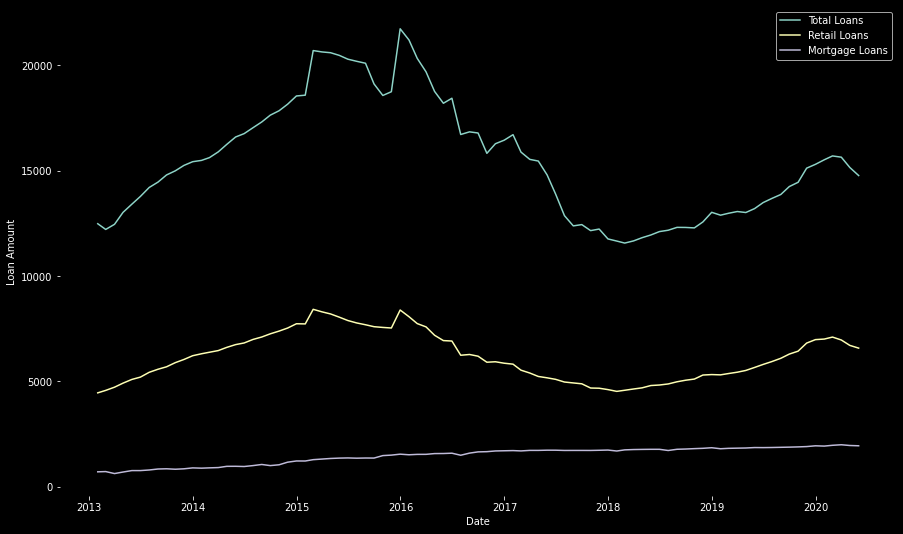

In [97]:
# Some visualization for exploring
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
plt.plot(new_loans.date, new_loans.total_loans, label='Total Loans')
plt.plot(new_loans.date, new_loans.retail_loans,label='Retail Loans')
plt.plot(new_loans.date, new_loans.mortgage_loans,label='Mortgage Loans')
plt.xlabel('Date')
plt.ylabel('Loan Amount')
plt.xticks()
plt.yticks()
# remove the plot frame lines
ax = plt.subplot(111)
ax.legend()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 